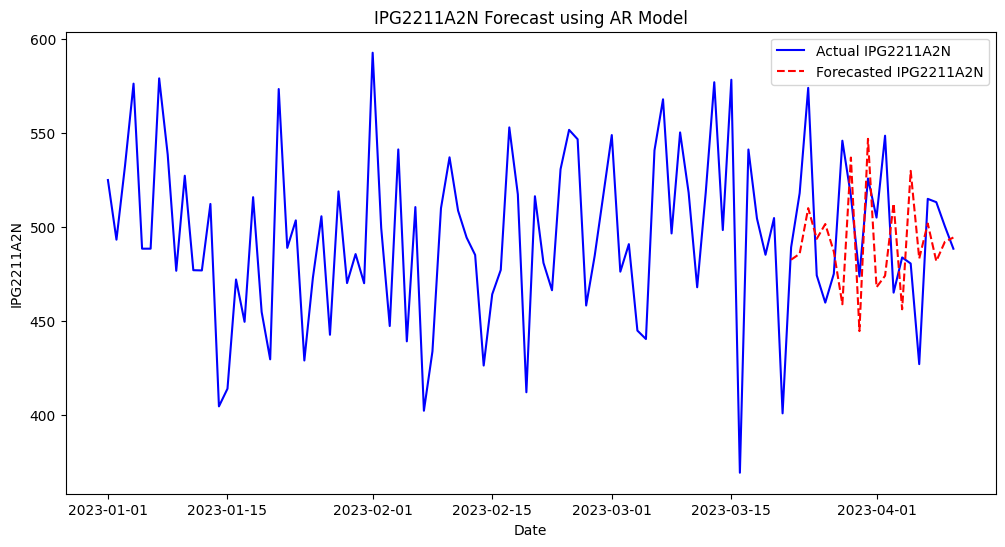

            IPG2211A2N
2023-03-22  482.428788
2023-03-23  485.563893
2023-03-24  509.869538
2023-03-25  493.549274
2023-03-26  501.412893
2023-03-27  486.739680
2023-03-28  458.694092
2023-03-29  536.808694
2023-03-30  444.404648
2023-03-31  546.764520
2023-04-01  467.763620
2023-04-02  473.873506
2023-04-03  512.330036
2023-04-04  456.018331
2023-04-05  529.713304
2023-04-06  483.041192
2023-04-07  501.680136
2023-04-08  481.631138
2023-04-09  491.925045
2023-04-10  494.246171


In [16]:
import numpy as np
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
np.random.seed(42)
n = 100
time = pd.date_range(start='2023-01-01', periods=n, freq='D')
IPG2211A2N = np.random.normal(loc=500, scale=50, size=n)
data = pd.DataFrame({
    'IPG2211A2N': IPG2211A2N
}, index=time)
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)
model = AutoReg(train_data['IPG2211A2N'], lags=15)
model_fitted = model.fit()
forecast_steps = len(test_data)
forecast = model_fitted.predict(start=len(train_data), end=len(train_data) + forecast_steps - 1)
forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=['IPG2211A2N'])
plt.figure(figsize=(12, 6))
plt.plot(data['IPG2211A2N'], label='Actual IPG2211A2N', color='blue')
plt.plot(forecast_df['IPG2211A2N'], label='Forecasted IPG2211A2N', color='red', linestyle='--')
plt.legend()
plt.title('IPG2211A2N Forecast using AR Model')
plt.xlabel('Date')
plt.ylabel('IPG2211A2N')
plt.show()
print(forecast_df)
